In [ ]:
## 인공신경망 
### 신경망

#### 개념 
> - 신경망은 인간의 뇌를 모방하여 만든 모델이다. 
> - 입력층(input Layer), 은닉층(Hidden Layer), 출력층(Output Layer)로 구성되어 있다. 
> - 특정 기억을 자주 떠올리면 시냅스가 활성화되 잘 기억하는 것 처럼 특정 입력을 다음 단계로 넘길지를 해당 입력-반응이 얼마나 자주 있었는지로 결정한다. 
> - 입력 - 반응을 결정하는 대표적인 함수는 sigmoid 함수이다.

#### 신경망 알고리즘
> - 신경망 알고리즘은 은닉층에서 정보의 조합이 어떻게 이루어지는지 실행 중에 파악하기가 어려워 결과 도출 과정을 설명하기가 어렵고, 모델도 수정하기가 어렵다. 
> - 또한 변수 선택에 매우 민감하다. 변수 간 상관관계가 높은 것들은 제거하고, 종속변수에 유의한 관계가 있는 것들만 선별하여 모델을 구성해야 성능이 좋아진다. 
> - 인공신경망에서 학습이란 노드와 노드 사이의 링크에 부여된 가중치를 조절하는 과정이다. 가중치를 계속 조절해가며 오차가 작아지도록 한다. 
> - 가중치의 조정은 출력 노드부터 역방향으로 이루어지므로 역전파(back propagation) 알고리즘이라고 부른다. 
> - 입력 변수가 많으면 입력 노드가 많아지고, 노드가 많아지면 추정해야 하는 가중치의 수가 늘어나게 된다. 추정해야할 가중치의 수가 늘어나게 되면 과적합이 발생할 가능성이 높아져 train 데이터의 예측력은 높더라도 test 데이터의 예측력이 떨어지게 된다. 
> - 따라서 종속변수와의 관계가 깊은 주요 변수를 최소한으로 선택하는 것이 필요하다. 

In [ ]:
#### 자료 준비

In [14]:
# 파일 입력
autoparts <- read.csv("autoparts.csv", header = TRUE)
autoparts1 <- autoparts[autoparts$prod_no == "90784-76001", c(2:11)]
autoparts2 <- autoparts1[autoparts1$c_thickness < 1000, ]
autoparts2$g_class <- as.factor(ifelse(autoparts2$c_thickness < 20, 1,ifelse(autoparts2$c_thickness < 32, 2, 3)))
# 트레이닝 셋, 테스트셋 분리 
t_index <- sample(1:nrow(autoparts2), size = nrow(autoparts2) * 0.7)
train <- autoparts2[t_index, ]
test <- autoparts2[-t_index, ]

In [2]:
# 신경망을 사용하기 위한 패키지를 불러오기
library(nnet)

In [19]:
m <- nnet(g_class ~ fix_time + a_speed + b_speed + separation + s_separation +
         rate_terms + mpa + load_time + highpressure_time, data = train, size = 10)

# weights:  133
initial  value 10884.640905 
iter  10 value 6640.891401
iter  20 value 6323.949393
iter  30 value 5645.437580
iter  40 value 5540.116973
iter  50 value 5448.313484
iter  60 value 5390.277362
iter  70 value 5338.399949
iter  80 value 5253.905062
iter  90 value 4937.910866
iter 100 value 4466.030733
final  value 4466.030733 
stopped after 100 iterations


In [20]:
yhat_test <- predict(m, test, type = 'class') # 분류모델이므로 type이 class
table <- table(real=test$g_class, predict = yhat_test)
table

    predict
real    1    2    3
   1   93  489   43
   2   20 5526  144
   3    0    7  209

#### 예측값 종류 부족 에러 
> - table에 컬럼을 보충하여 정확도 계산이 이뤄질 수 있게 한다. 
> - x1 <- c(0,0,0)
> - table <- cbind(x1,table)
> - table
> - (table[1,1] + table[2,2] + table[3,3])

In [21]:
(table[1,1] + table[2,2] + table[3,3])/sum(table)
# 정분류율: 89.23% 

[1] 0.8923595

SHA-1 hash of file is 74c80bd5ddbc17ab3ae5ece9c0ed9beb612e87ef
Loading required package: scales
Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"Loading required package: reshape
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
"there is no package called 'reshape'"Loading required package: res

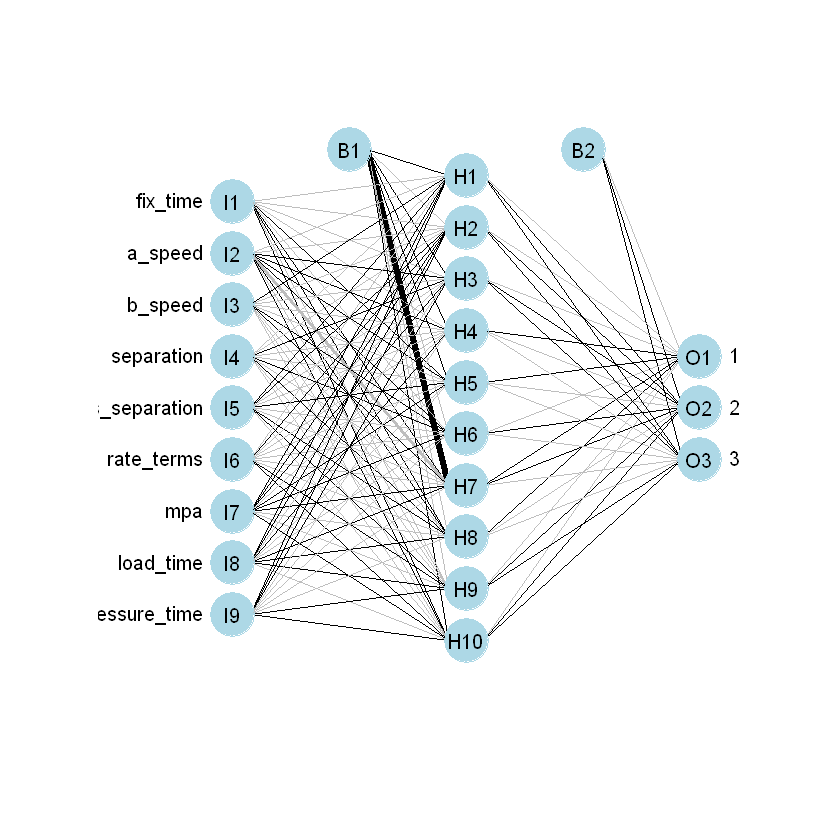

In [22]:
library(reshape2)
library(devtools)
source_url('http://gist.githubusercontent.com/fawda123/7471137/raw/466c1474d0a505ff044412703516c34f1a4684a5/nnet_plot_update.r')
plot(m)

In [ ]:
#### 데이터 예측 분류 

In [23]:
new.data <- data.frame(fix_time = c(87,85.6), a_speed = c(0.609,0.472),
                       b_speed = c(1.175,1.685),
                      separation = c(242.7,243.4), s_separation = c(657.5,657.9),
                      rate_terms = c(95,95), mpa = c(78,28.8),
                       load_time =c(18.1,18.2),highpressure_time =c(82,60))

predict(m,newdata = new.data, type = 'class')

[1] "2" "3"